In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.interpolate as scpi
import matplotlib.pyplot as plt

import import_ipynb
from Polynome2p1 import *
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


In [2]:
fonctions_test = FT.fonctions("Sans Arg","Classic")

In [3]:
def test_approx(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,100_001)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx

### Variation de p

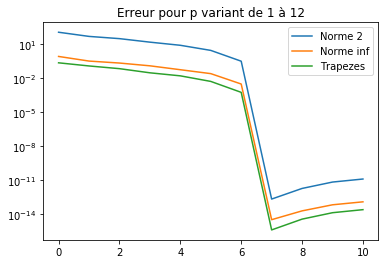

In [4]:
h = 1
epsilon=0.001
p = np.arange(1,12,1)
Prod_poly_10_7_h = FT.Prod_poly_10_7_h
name = str(Prod_poly_10_7_h).split(' ')[1]

Err = np.zeros((3,len(p)))

for i in range(len(p)):
    px,fx = test_approx(p[i],Prod_poly_10_7_h,h,epsilon,0,0)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = trapezes(px-fx)
    
plt.semilogy(Err[0,:],label="Norme 2")
plt.semilogy(Err[1,:],label="Norme inf")
plt.semilogy(Err[2,:],label="Trapezes")
plt.legend()
plt.title("Erreur pour p variant de 1 à 12")
plt.savefig("./Images/EtudesParamOpe/Parametres/variationP/eps/"+name+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
plt.savefig("./Images/EtudesParamOpe/Parametres/variationP/png/"+name+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
plt.show()

### Variation de h

In [5]:
def test_ordre_fonction(f,p,epsilon):
    h = [1/2,1/4,1/8,1/100,1/200,1/400,1/1000,1/2000,1/10000]
    for i in range(len(h)):
        px,fx = test_approx(p,f,h[i],epsilon,0)
        Err[0,i] = npl.norm(px-fx)
        Err[1,i] = npl.norm(px-fx,np.inf)
        Err[2,i] = trapezes(px-fx)
    
    logErr = np.log10(Err)
    logh = np.log10(h)
    plt.plot(logh,logErr[1,:])
    plt.show()
    penteExist = int(input("Entrer 1 s'il y a une partie lineaire, 0 si on est à precision machine, -1 sinon\nRéponse : "))
    if penteExist == 0 : 
        print("Pas de droite : precision machine")
    elif penteExist == -1 : 
        print("Methode d'ordre : ", 0)
    else : 
        h_min = float(input("Entrer la valeur min de la partie lineaire :\n(Entrer 0 si pas de debut de droite)\nRéponse : "))
        h_max = float(input("Entrer la valeur max de la partie lineaire :\n(Entrer 0 si pas de fin de droite)\nRéponse : "))
        if h_min != 0. : 
            index_min = np.where(logh>=h_min) 
            logh = logh[index_min[0]]
            logErr = logErr[:,index_min[0]]
        if h_max != 0. : 
            index_max = np.where(logh<=h_max) 
            logh = logh[index_max[0]]
            logErr = logErr[:,index_max[0]]
        affine = np.polyfit(logh,logErr[1,:],1)
                
        print("\n\n################################################################################")
        print("######################            Test ordre              ######################")  
        print("################################################################################")
        print("Fonction  Polynome de degré")
        print(" %s  %11g"%(str(f).split(' ')[1],2*p+1))
        plt.plot(logh,logErr[1,:],label="Norme inf")
        plt.plot(logh,logErr[0,:],label="Norme 2")
        plt.plot(logh,logErr[2,:],label="Trapezes")
        plt.plot(logh, round(affine[0])*logh,label="Ordre :"+str(int(affine[0])))
        plt.legend()
        plt.show()    
        print("==> Methode d'ordre : ", round(affine[0]))

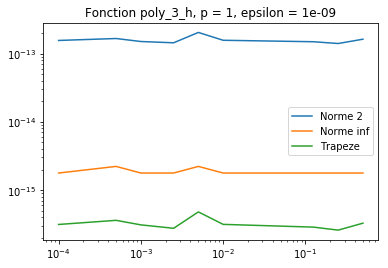

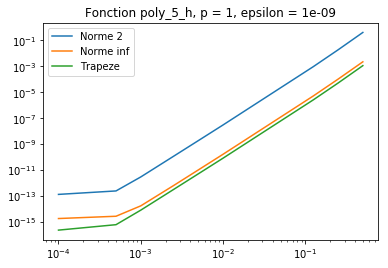

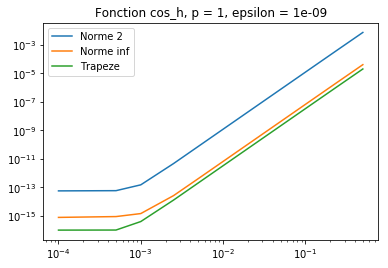

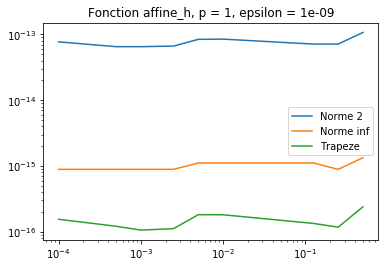

In [6]:
h = [1/2,1/4,1/8,1/100,1/200,1/400,1/1000,1/2000,1/10000]
p = 1
epsilon = 1e-9
Err = np.zeros((3,len(h)))
fonctions_test = FT.fonctions("Sans Arg",'Classic')

for f in fonctions_test : 
    for i in range(len(h)):
        px,fx = test_approx(p,f,h[i],epsilon,0)
        Err[0,i] = npl.norm(px-fx)
        Err[1,i] = npl.norm(px-fx,np.inf)
        Err[2,i] = trapezes(px-fx)

    plt.loglog(h,Err[0,:],label="Norme 2")
    plt.loglog(h,Err[1,:],label="Norme inf")
    plt.loglog(h,Err[2,:],label="Trapeze")
    name = str(f).split(' ')[1]
    plt.title("Fonction "+name+", p = "+str(p)+", epsilon = "+str(epsilon))
    plt.savefig("./Images/EtudesParamOpe/Parametres/variationH/eps/"+name+", p = "+str(p)+", epsilon = "+str(epsilon)+".eps", format='eps')
    plt.savefig("./Images/EtudesParamOpe/Parametres/variationH/png/"+name+", p = "+str(p)+", epsilon = "+str(epsilon)+".png", format='png')
    plt.legend()
    plt.show()
    #test_ordre(h,Err)

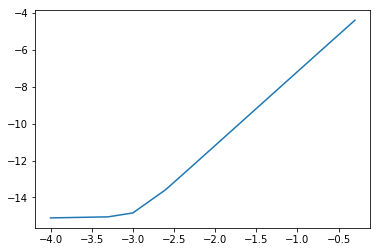

Entrer 1 s'il y a une partie lineaire, 0 si on est à precision machine, -1 sinon
Réponse : 1
Entrer la valeur min de la partie lineaire :
(Entrer 0 si pas de debut de droite)
Réponse : -3
Entrer la valeur max de la partie lineaire :
(Entrer 0 si pas de fin de droite)
Réponse : 0


################################################################################
######################            Test ordre              ######################
################################################################################
Fonction  Polynome de degré
 cos_h            3


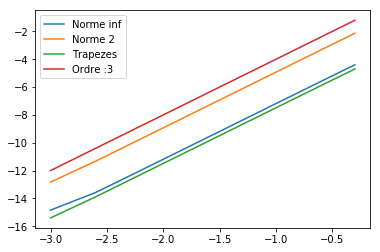

==> Methode d'ordre :  4.0


In [7]:
test_ordre_fonction(fonctions_test[2],1,1e-9)

###### Pb sur le dernier : stagne à 10-2
Origine du pb possible : nb de points insuffisants et/ou epsilon trop grand (si h grand la fonction trop proche de 0 => valeur cachée dans epsilon

## Variation de epsilon

In [8]:
def test_approx_eps(p,f,h,epsilon,affichage=None,s=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,s=s)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.figure(figsize=(18,5))
        axes = plt.subplot(1,2,2)
        ordmax = 3*max(epsilon,np.min(fx))
        axes.set_ylim(-epsilon, ordmax)
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.plot(x,epsilon*np.ones(len(x)),'r',label='valeur de epsilon')
        plt.legend()
        plt.title("Graphe zoome")
        plt.subplot(1,2,1)
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.plot(x,epsilon*np.ones(len(x)),'r')
        plt.legend()   
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx

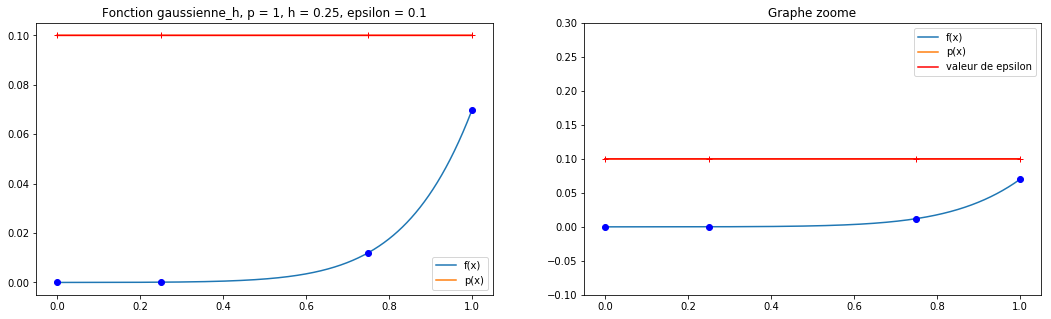

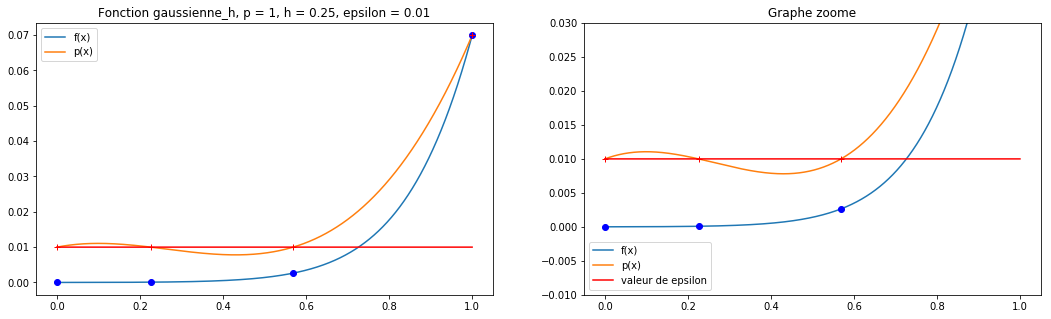

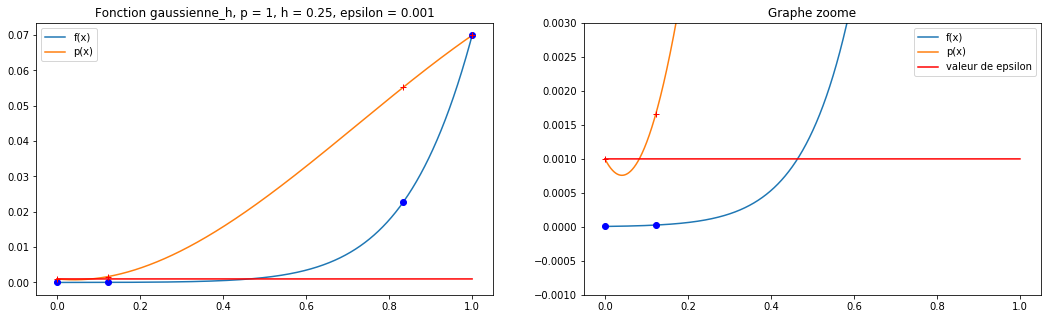

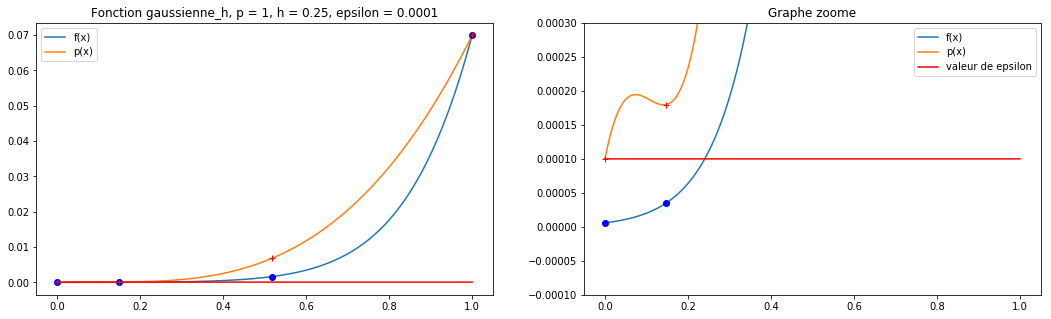

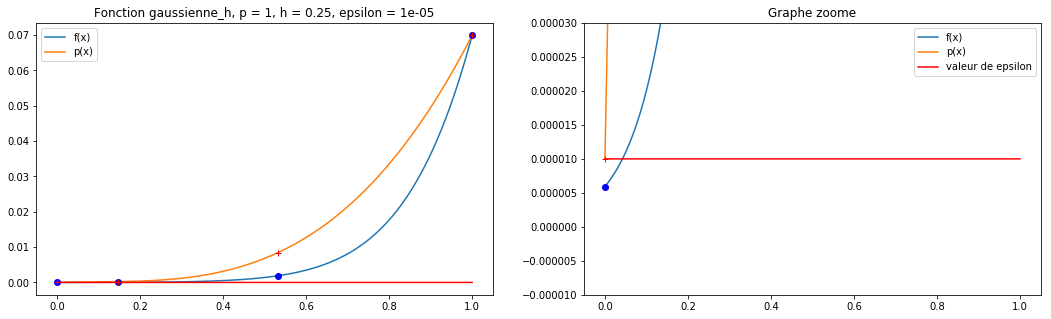

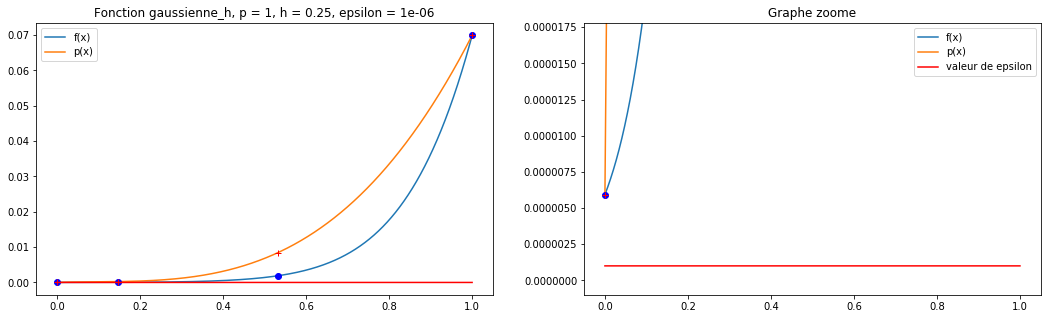

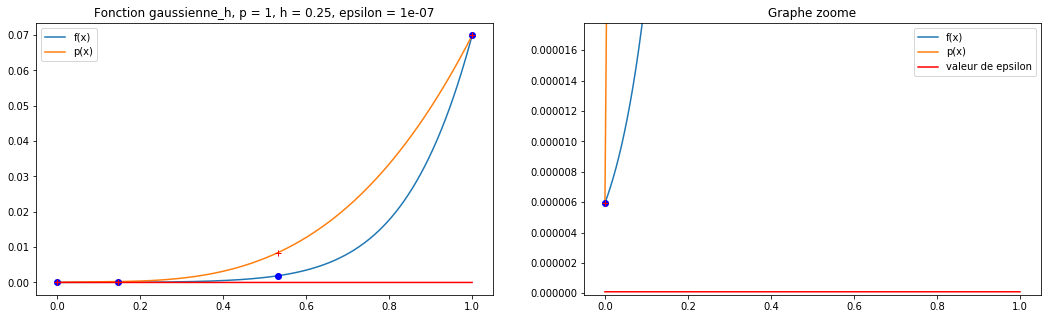

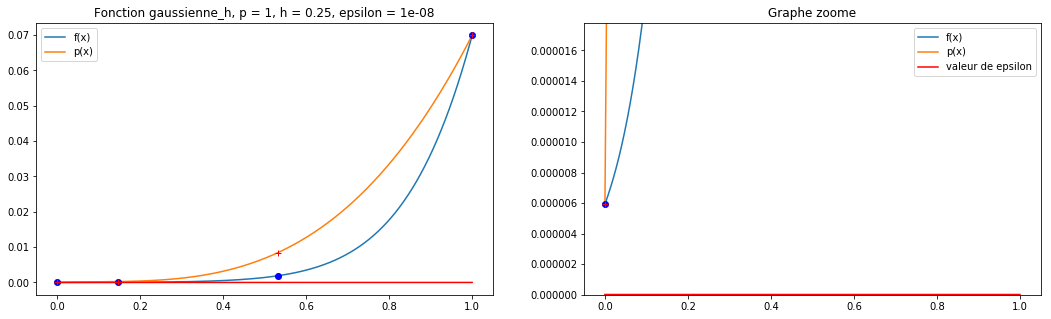

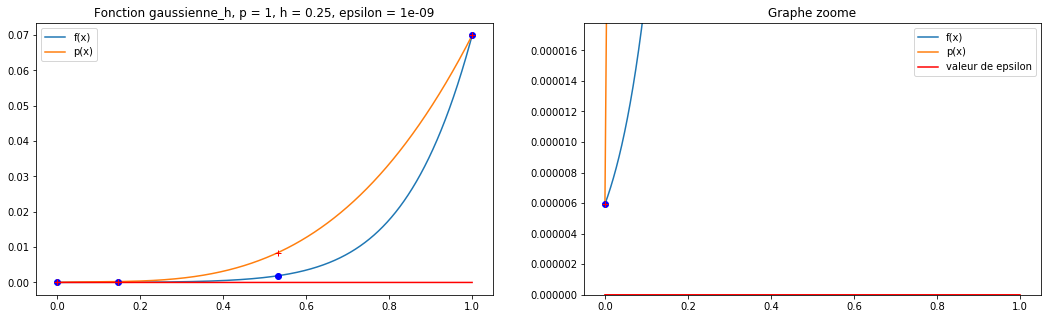

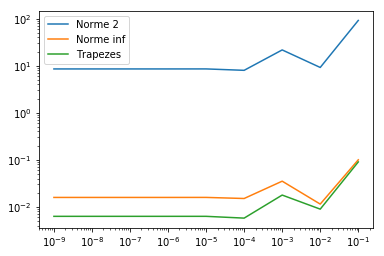

In [9]:
h = 1/4 
p = 1
epsilon = 1/(10**np.arange(1,10,1))
Err = np.zeros((3,len(epsilon)))
gaussienne_h = FT.gaussienne_h
name = str(gaussienne_h).split(' ')[1]

for i in range(len(epsilon)):
    px,fx = test_approx_eps(p,gaussienne_h,h,epsilon[i],"VariationEps",1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = trapezes(px-fx)

plt.loglog(epsilon,Err[0,:],label="Norme 2")
plt.loglog(epsilon,Err[1,:],label="Norme inf")
plt.loglog(epsilon,Err[2,:],label="Trapezes")
plt.legend()
plt.savefig("./Images/EtudesParamOpe/Parametres/variationEps/eps/"+name+", p = "+str(p)+", h = "+str(h)+".eps", format='eps')
plt.savefig("./Images/EtudesParamOpe/Parametres/variationEps/png/"+name+", p = "+str(p)+", h = "+str(h)+".png", format='png')
plt.show()

## Effets de Gibbs

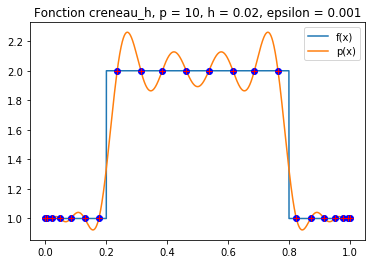

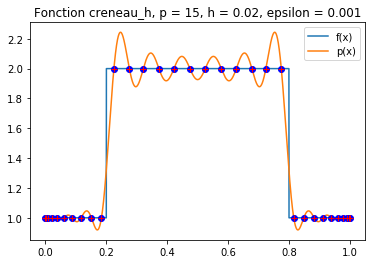

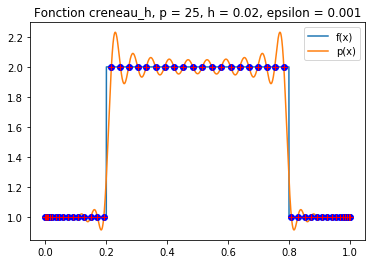

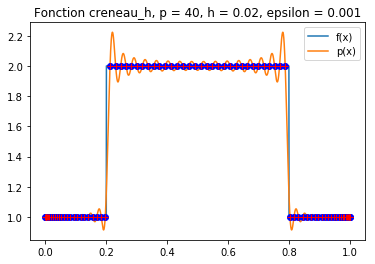

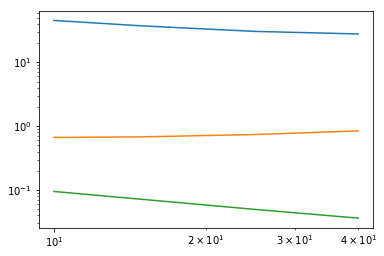

In [10]:
p = [10,15,25,40]
h  = 0.02
epsilon = 1e-3
Err = np.zeros((3,len(p)))
creneau = FT.creneau_h

for i in range(len(p)):
    px,fx = test_approx(p[i],creneau,h,epsilon,"effetGibbs",1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = trapezes(px-fx)

plt.loglog(p,Err[0,:],label="Norme 2")
plt.loglog(p,Err[1,:],label="Norme inf")
plt.loglog(p,Err[2,:],label="Trapezes")

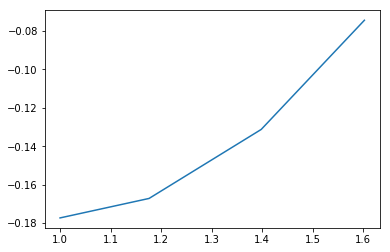

Entrer la valeur min de partie lineaire : 
 (Entrer 0 si pas de debut de droite)
Réponse : 0
Entrer la valeur max de partie lineaire : 
 (Entrer 0 si pas de fin de droite)
Réponse : 0


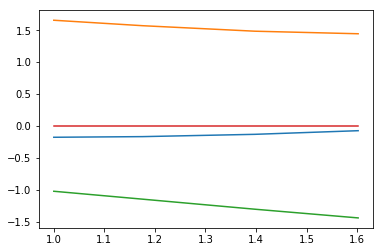

==> Pente :  0.0


In [11]:
logp = np.log10(p)
logErr = np.log10(Err)
plt.plot(logp,logErr[1,:])
plt.show()
p_min = float(input("Entrer la valeur min de partie lineaire : \n (Entrer 0 si pas de debut de droite)\nRéponse : "))
p_max = float(input("Entrer la valeur max de partie lineaire : \n (Entrer 0 si pas de fin de droite)\nRéponse : "))
if p_min != 0. : 
    index_min = np.where(logp>=p_min) 
    logp = logp[index_min[0]]
    logErr = logErr[:,index_min[0]]
if p_max != 0. : 
    index_max = np.where(logp<=p_max) 
    logp = logp[index_max[0]]
    logErr = logErr[:,index_max[0]]
affine = np.polyfit(logp,logErr[1,:],1)
plt.plot(logp,logErr[1,:],label="Norme inf")
plt.plot(logp,logErr[0,:],label="Norme 2")
plt.plot(logp,logErr[2,:],label="Trapezes")
plt.plot(logp, round(affine[0])*logp,label="Ordre :"+str(int(affine[0])))
plt.show()

print("==> Pente : ", round(affine[0]))